# Lab Week 5

## EOSC 211

### Learning Objectives:

1. Define variables using user input data

2. Use formatted text with f string literals to label plots

3. Change variable datatypes using *type casting*

3. Apply conditional statements `if elif else`

## Part 1: The `plt.annotate()` Function and Formatted Text (Tutorial)

This lab will focus on applying some of the new concepts we have learned to work with data very similar to what we have seen before. This week's dataset is a *digital elevation model* (DEM) and your challenge is to write a program for the analysis of topographic slopes. Usually we don’t have slopes, instead elevation data are stored in a Digital Elevation Model (DEM), which is basically a large array containing elevation above sea level over a grid of points. You already saw a DEM in the lab for Week 3, though we didn’t call it by that name. The program you write let a "user" pick a point on a plot of the DEM, then calculate the slope at that point, and use formatted text to tell you whether that point is east-facing, west-facing, or relatively flat. Your code will have to take into account that the world is round ifyou select a point on the edge of the DEM. A useful way of writing this kind of program is to proceed in a few steps:

* Break up the problem into parts.   One technique useful for programs handling a lot of ‘special cases’ is to make it work for only one of the cases as a starting point.

* In this case we won’t make you start from scratch - instead you will work on fixing broken code as a starting point, Then you have to add a piece of code that does the right thing if the input data is ‘good’ **note, no tutorial code is broken in this version of L5**

* Then, think about ways in which the input data can be ‘bad’.  Add code to test for these conditions and to handle them in a useful way. This code will often get squeezed into the middle of the existing code.

Start by importing our required packages as usual, and importing our dataset:

In [1]:
from e211_lib import e211 
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# get the data and query the size of the array
topo = e211.load_topo("lab5_topo.mat")
topo.shape # rows, columns

(180, 360)

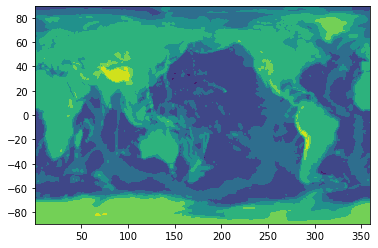

In [3]:
# create lat and lon arrays just like week 3 lab
lats = np.linspace(-89.5, 89.5, topo.shape[0])
lons = np.linspace(0.5, 359.5, topo.shape[1])

# see if our labels correctly match the plot
plt.contourf(lons, lats, topo);

Does everything look alright with our preliminary data visualization? If so, let's continue on to the *data processing* phase.

We would like to our program to reference points on our map by their latitude/longitude coordinates, and be able to take in any arbitrary pair of coordinates and process the closest available point on the map. We can use python's built in [input()](https://www.w3schools.com/python/ref_func_input.asp) function to assign coordinate variables based on user input, and the [argmin()](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) attribute of numpy arrays to find the closest point on the map to the user specified lat/lon. 

Take a second to understand what the code is doing in the following cell. We need to make sure to properly differentiate between the *lat/lon coordinates* of a location (which a user will specify), the *array value* (i.e height above sea level stored in the array `topo`), and the *array index* that references that point in the array.

In [4]:
# input() takes in a string, we need to re-cast to float in order to do math
usrlat = 50 # float(input("Enter a latitude: "))
usrlon = 50 # float(input("Enter a longitude: "))

# assign new variables for the closest indexes to user specified lat & lon
ilat = np.abs(lats-usrlat).argmin()
ilon = np.abs(lons-usrlon).argmin()

# print out a message using f strings
print(f"User specified variables: lat: {usrlat}, lon: {usrlon}")
print(f"Closest values in array: lat: {lats[ilat]}, lon: {lons[ilon]} at indices [{ilat}, {ilon}]")
print(f"Value of topo array at that point: {topo[ilat, ilon]}")

User specified variables: lat: 50, lon: 50
Closest values in array: lat: 49.5, lon: 49.5 at indices [139, 49]
Value of topo array at that point: 0


For the *output* of this program, we'll use the `plt.annotate()` function to label our user-selected point on the map, as well as display the elevation at that point. Later, you will build on this cell to add more information and present it as a polished scientific figure. This cell uses the function twice, once to draw a red X and once to label the point with some information. Check out the [docs for plt.annotate()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) for more info on how to implement the function.

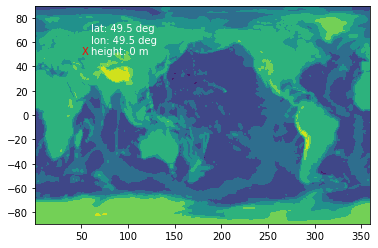

In [5]:
# output
img = plt.contourf(lons, lats, topo)
plt.annotate("X", (usrlon, usrlat), color="red")
the_label = f"lat: {lats[ilat]} deg\nlon: {lons[ilon]} deg\nheight: {topo[ilat, ilon]} m"
plt.annotate(the_label, (usrlon + 10, usrlat), color='white');

## Part 2:  Calculate the Topography Slope

Your task is to solve the following problem: What is the east/west slope (in degrees) at the point you specify at the input? The east/west slope is a height difference between the point immediately to the RIGHT (or EAST) of the one you picked and the one immediately to the LEFT (or WEST) of it,  divided by the horizontal distance of these two points (think $slope = \frac{rise}{run}$). Then take the arc-tangent to get the result in degrees:

$$
Slope \approx tan^{-1}\left(\frac{topo(i, j+1) - topo(i, j-1)}{\Delta LON \times 111e3 \times cos(LAT)}\right)
$$


| Symbol  | Variable      |  Units   |
|:--|:----------------------------------|:------------|
| $topo$     | topography array      | $height$ ($m$) |
| $i,j$  | lat, lon indices      | --  |
| $\Delta LON$  | change in longitude between two points      | $degrees$  |
| $111e3$  | at the equator, 1 degree=111000m      | $m/deg$  |
| $LAT$  | latitude of the point selected      | $degrees$  |
| $cos(LAT)$  | a correction factor to take into account longitude convergence at the poles     | --  |

### 2a

In the cell below, write code to make this work for points well within the array (i.e. away from the edges of the map). Make sure the trigonometric functions you use are for degrees and not radians. You may find the functions `np.deg2rad()` and `np.rad2deg()` helpful.

In [6]:
# your code here

### 2b

Use `if` `elif` `else` blocks to print the following message to the screen:

(i)  The latitude and longitude of the selected point (note - latitudes can be N or S, longitudes can always be E)

(ii)  The elevation AND the slope at that point (in degrees)

(iii)  A  message  saying  “Flat”  if  the  slope  angle  is  between  -0.1  and  +0.1  degrees,  “East-facing,” or “West-facing” if the slope is larger and either east - or west-facing, respectively. An “east-facing” slope tilts DOWN towards the east. Use *f string literals* to compose the message in a nicely formatted way, something like:

       At 30.5 N, 100.5 E, the height is 4014 m and the slope is -0.188 degrees. This is east-facing.
       
In part 3, you will create a scientific figure with the slope and aspect annotated on the plot. For now, print the message to the screen

In [7]:
# your code here

##  Part 3: Selections - Check Arguments


Often with user input, your program has to first check their validity to make sure they don’t crash the program or get an unwanted (incorrect) result. We already implemented code to make sure to reference the *closest available point to the input*, rather than trusting that input will precisely match the values in the arrays `lats` and `lons`. 

In general, it is a good strategy to write code to handle the majority of possible cases, running it, then modifying  to account for "edge cases" as needed.

What other "bad" inputs can we anticipate that would result in buggy output? What if the user enters a value at the edge of the map (ie `usrlon = 355.5`), such that there is no $j+1$ element of the array? What about `usrlon = 0`? Modify your code from part **2a** as necessary to handle these possibilities. (**hint:** Do you encounter the same problem on both the left and right edges of the map? Why/why not?) 

### To Hand In:

In the cell(s) below, write a self contained program (you can recycle code from earlier parts of the lab) that runs through the whole process of *import/input, data scrubbing, presentation.*

#### Import/Input
This part should be pretty trivial, just copy/paste the appropriate code from above

#### Data Scrubbing
Use `if` `elif` `else` statements and *type casting* to handle the possible special cases for user input

#### Output
Generate a scientific figure with the following:

* An X marking the selected location
* Text beside the X specifying the lat, lon, elevation, slope, and aspect (E or W facing) of the point
* All the regular fix-ins for a scientific figure:

<div class="alert alert-block alert-info">
<b>Scientific Figure Checklist:</b> 

- [ ] Title 
- [ ] Axes labels with units 
- [ ] Legend
- [ ] Does the figure *make sense* just by looking at it? The data should be clear without referencing anything outside the figure
- [ ] Does it *look good*? 
</div>

In [8]:
# your code here